In [1]:
%run imports.ipynb
import dask.array as da

In [3]:
from dask_kubernetes import KubeCluster
cluster = KubeCluster(n_workers=30)
cluster

/opt/conda/lib/python3.6/site-packages/distributed/dashboard/core.py:72: UserWarning: 
Port 8787 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.
  warnings.warn("\n" + msg)


In [4]:
from dask.distributed import Client
client = Client(cluster)
client

Client Scheduler: tcp://10.34.231.196:42751 Dashboard: /user/carlo%20mariade%20marco1/proxy/43617/status,Cluster Workers: 21 Cores: 42 Memory: 126.00 GB


In [5]:
# set up sample metadata
tbl_samples_study = (
    etl
    .fromtsv('meta_gambia.txt')
    .convert((3, 4, 5, 6, 7), float)
    .sort('ox_code')
)
tbl_samples_study

0|Sample_ID,1|ox_code,2|src_code,3|mean_coverage,4|pc_genome_covered,5|mapping_rate,6|mismatch_rate,7|duplicate_rate,8|ena_sample_acc,9|village,10|PCR,11|SINE200,12|Lat,13|Long,14|Village_IGS,15|Village_S200,16|Posizione,17|chrom X identification,18| karyotype 2R,19|2Rconf,20|2Rb,21|2Rc,22|2Rd,23|Inv2La,24|Taxon,25|Note,26|month
53624,AG0378-CW,001-1001,33.93,88.06,82.21,2.25,8.39,ERS680029,Tankular,M,na,13°25' N,16°02' W,Tankular_M,Tankular_na,Sud,A,+/+,-----,-,-,-,1,53624,14/06/2015,8
53625,AG0379-CW,001-1011,30.69,88.19,82.0,2.37,3.93,ERS680030,Tankular,M,na,13°25' N,16°02' W,Tankular_M,Tankular_na,Sud,A,b/b,-2---,2,-,-,2,53625,14/06/2015,8
53626,AG0380-CW,001-1032,35.08,88.02,82.33,2.35,9.18,ERS680031,Tankular,M,na,13°25' N,16°02' W,Tankular_M,Tankular_na,Sud,A,b/b,-2---,2,-,-,2,53626,14/06/2015,8
53627,AG0381-CW,001-1046,35.11,89.0,80.33,2.3,3.57,ERS680032,Tankular,M,na,13°25' N,16°02' W,Tankular_M,Tankular_na,Sud,A,b/b,-2---,2,-,-,2,53627,14/06/2015,8
53628,AG0382-CW,001-1048,36.75,89.56,84.65,2.32,2.18,ERS680033,Tankular,M,na,13°25' N,16°02' W,Tankular_M,Tankular_na,Sud,A,b/b,-2---,2,-,-,1,53628,14/06/2015,8


In [6]:
# this is the important bit - exclude samples with poor coverage
samples_study_pass = tbl_samples_study.gt('mean_coverage', 14).gt('pc_genome_covered', 88).values('ox_code').list()
len(samples_study_pass)

68

In [7]:
# set up sample metadata from Ag1000G phase 2 AR1
tbl_samples_ar1 = (
    etl
    .fromtsv('samples.meta.txt')
    #.convert(0, int)
)
tbl_samples_ar1

0|ox_code,1|src_code,2|population,3|country,4|location,5|site,6|contributor,7|contact,8|year,9|m_s,10|sex,11|n_sequences,12|mean_coverage,13|ebi_sample_acc,14|latitude,15|longitude
AA0040-C,Twifo_Praso__E2,GHcol,Ghana,Twifo Praso,Twifo Praso,David Weetman,David Weetman,2012,M,F,95033368,30.99,ERS311878,5.60858,-1.54926
AA0041-C,Twifo_Praso__H3,GHcol,Ghana,Twifo Praso,Twifo Praso,David Weetman,David Weetman,2012,M,F,95843804,31.7,ERS311886,5.60858,-1.54926
AA0042-C,Takoradi_C7,GHcol,Ghana,Takoradi,Takoradi,David Weetman,David Weetman,2012,M,F,107420666,35.65,ERS311894,4.91217,-1.77397
AA0043-C,Takoradi_H8,GHcol,Ghana,Takoradi,Takoradi,David Weetman,David Weetman,2012,M,F,95993752,29.46,ERS311902,4.91217,-1.77397
AA0044-C,Takoradi_D10,GHcol,Ghana,Takoradi,Takoradi,David Weetman,David Weetman,2012,M,F,103044262,33.67,ERS311910,4.91217,-1.77397


## Setup genotype data

In [8]:
# pick a chromosome
chrom = '3L'

In [9]:
# setup callset from the study
callset_study = h5py.File(
    'data/1130-AG-GM-CAPUTO.%s.h5' % chrom
)
callset_study

<HDF5 file "1130-AG-GM-CAPUTO.3L.h5" (mode r+)>

In [10]:
# setup samples from the study
samples_study = [str(s, 'ascii') for s in callset_study[chrom]['samples'][:]]
samples_study[:5]

['AG0378-CW', 'AG0379-CW', 'AG0380-CW', 'AG0381-CW', 'AG0382-CW']

In [ ]:
# setup genotypes from the study
genotypes_study = allel.GenotypeChunkedArray(callset_study[chrom]['calldata/genotype'])
genotypes_study

In [ ]:
# subset to keep only the samples that pass our QC
sidx = [samples_study.index(s) for s in samples_study_pass]
genotypes_study_qc = genotypes_study.take(sidx, axis=1)
genotypes_study_qc

In [ ]:
# setup callset from ag1000g phase 2
callset_phase2= callset_biallel
callset_phase2

In [ ]:
# setup genotypes from ag1000g phase 2
genotypes_phase2 = allel.GenotypeDaskArray(callset_phase2[chrom]['calldata/GT'])
genotypes_phase2

### Loading positions

In [14]:
pos_gambia = allel.SortedIndex(callset_study[chrom]["variants"]["POS"][:])
pos_gambia

0,1,2,3,4,...,16437130,16437131,16437132,16437133,16437134
15,19,20,23,24,...,41963165,41963183,41963184,41963288,41963345


In [15]:
pos_phase2 = allel.SortedIndex(callset_phase2[chrom]["variants/POS"])
pos_phase2

0,1,2,3,4,...,7897661,7897662,7897663,7897664,7897665
9790,9791,9798,9812,9815,...,41956530,41956532,41956537,41956541,41956551


Now I have to take only phase1 positions in phase2

In [16]:
loc1, loc2 = pos_phase2.locate_intersection(pos_gambia)
loc1, loc2

(array([ True, False,  True, ...,  True,  True,  True]),
 array([False, False, False, ..., False, False, False]))

In [17]:
pos_p2_sel = pos_phase2[loc1]
pos_p2_sel

0,1,2,3,4,...,6888807,6888808,6888809,6888810,6888811
9790,9798,9812,9818,9829,...,41956530,41956532,41956537,41956541,41956551


In [18]:
pos_p1_sel = pos_gambia[loc2]
pos_p1_sel

0,1,2,3,4,...,6888807,6888808,6888809,6888810,6888811
9790,9798,9812,9818,9829,...,41956530,41956532,41956537,41956541,41956551


In [33]:
gambia_phase2 = genotypes_study_qc.compress(loc2)
gambia_phase2

<GenotypeChunkedArray shape=(6888812, 68, 2) dtype=int8 chunks=(13455, 68, 2)
   nbytes=893.5M cbytes=50.7M cratio=17.6
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [34]:
genotypes_phase2_sel = genotypes_phase2.compress(loc1)
genotypes_phase2_sel

<GenotypeChunkedArray shape=(6888812, 1142, 2) dtype=int8 chunks=(1682, 1142, 2)
   nbytes=14.7G cbytes=712.4M cratio=21.1
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

## Combining sample metadata

In [23]:
tbl_samples_study_pass = tbl_samples_study.selectin('ox_code', samples_study_pass).sort('ox_code')
tbl_samples_study_pass.nrows()

68

In [24]:
assert samples_study_pass == tbl_samples_study_pass.values('ox_code').list()

In [25]:
tbl_samples_combined = (
    tbl_samples_ar1.cut('ox_code', 'src_code', 'population')
    .cat(
        tbl_samples_study_pass
        .cut('ox_code', 'src_code')
        .addfield('population', 'GM_C')
    )
)
tbl_samples_combined

0|ox_code,1|src_code,2|population
AA0040-C,Twifo_Praso__E2,GHcol
AA0041-C,Twifo_Praso__H3,GHcol
AA0042-C,Takoradi_C7,GHcol
AA0043-C,Takoradi_H8,GHcol
AA0044-C,Takoradi_D10,GHcol


In [26]:
tbl_samples_combined.nrows()

1210

In [27]:
df = etl.todataframe(tbl_samples_combined)
df.head()

,ox_code,src_code,population
0,AA0040-C,Twifo_Praso__E2,GHcol
1,AA0041-C,Twifo_Praso__H3,GHcol
2,AA0042-C,Takoradi_C7,GHcol
3,AA0043-C,Takoradi_H8,GHcol
4,AA0044-C,Takoradi_D10,GHcol


In [35]:
grp = df.groupby("population")

------------------

## Allele Count

In [36]:
ac_gambia = gambia_phase2.count_alleles()
ac_gambia_sel = allel.AlleleCountsChunkedArray(ac_gambia[:, :2])

In [37]:
ac_phase2_sel = genotypes_phase2_sel.count_alleles()

In [38]:
ac_gambia.shape, ac_phase2_sel.shape

((6888812, 3), (6888812, 2))

In [41]:
ac_combine = allel.AlleleCountsArray(ac_phase2_sel + ac_gambia_sel)
ac_combine

<AlleleCountsArray shape=(6888812, 2) dtype=int32>
2413    5
2415    3
2414    2
...
2397   13
2345   63
2411    1

In [42]:
loc_bi_seg = (ac_combine.max_allele() <= 1) & (ac_combine[:, :2].min(axis=1) > 7)

---------------------

## Downsampling

In [43]:
variants_phase2 = allel.VariantChunkedTable(callset_biallel[chrom]['variants'],
                                         names=['POS', 'REF', 'ALT', 'FILTER_PASS'])
variants_phase2

<VariantChunkedTable shape=(7897666,) dtype=[('POS', '<i4'), ('REF', 'S1'), ('ALT', 'S1'), ('FILTER_PASS', '?')]
   nbytes=52.7M cbytes=-4 cratio=-13820915.5
   values=zarr.hierarchy.Group>

In [44]:
n_snps = 100000
loc_asc = (
    pos_p1_sel &
    loc_bi_seg
)
vidx = np.nonzero(loc_asc)[0]
vidx = np.random.choice(vidx, n_snps, replace=False)
vidx.sort()
len(vidx)

100000

In [45]:
# subset the genotypes
genotypes_gambia_asc = gambia_phase2.take(vidx, axis=0)
genotypes_gambia_asc

<GenotypeChunkedArray shape=(100000, 68, 2) dtype=int8 chunks=(6250, 68, 2)
   nbytes=13.0M cbytes=1.7M cratio=7.5
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [46]:
# subset the genotypes
genotypes_phase2_asc = genotypes_phase2_sel.take(vidx, axis=0)
genotypes_phase2_asc

<GenotypeChunkedArray shape=(100000, 1142, 2) dtype=int8 chunks=(782, 1142, 2)
   nbytes=217.8M cbytes=25.3M cratio=8.6
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [47]:
# combine genotypes from both callsets
genotypes_combined = allel.GenotypeChunkedArray(np.hstack((genotypes_phase2_asc, genotypes_gambia_asc)))
genotypes_combined

<GenotypeChunkedArray shape=(100000, 1210, 2) dtype=int8
   nbytes=230.8M
   values=numpy.ndarray>

---------------------------------

In [48]:
gn = genotypes_combined.to_n_alt()
gn

<ChunkedArrayWrapper shape=(100000, 1210) dtype=int8 chunks=(782, 1210)
   nbytes=115.4M cbytes=19.4M cratio=5.9
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [49]:
locu = allel.locate_unlinked(gn, size=500, step=100, threshold=.1)
np.count_nonzero(locu)

70164

In [50]:
gnu = gn.compress(locu, axis=0)

In [51]:
coords, model = allel.pca(gnu, n_components=20, scaler='patterson')

In [52]:
df_samples = tbl_samples_combined.todataframe()
df_samples.head()

,ox_code,src_code,population
0,AA0040-C,Twifo_Praso__E2,GHcol
1,AA0041-C,Twifo_Praso__H3,GHcol
2,AA0042-C,Takoradi_C7,GHcol
3,AA0043-C,Takoradi_H8,GHcol
4,AA0044-C,Takoradi_D10,GHcol


In [61]:
pop_colours = {
    'GM': '#FF0000',
    'GM_C' : sns.color_palette('Greens', 2)[1],
    'GW': sns.color_palette('YlOrBr', 5)[1],
    'FRgam' : sns.color_palette('Greys', 5)[3],
    'KE' : '#000000',
}

In [62]:
populations = ['GM', 'KE', 'GW', 'GM_C', 'FRgam']

In [74]:
def plot_pca_coords(coords, model, pc1, pc2, ax, sample_population):
    sns.despine(ax=ax, offset=5)
    x = coords[:, pc1]
    y = coords[:, pc2]
    for pop in populations:
        flt = (sample_population == pop)
        ax.plot(x[flt], y[flt], marker='^', linestyle=' ', mec=pop_colours[pop], mfc='none', mew=2, label=pop, markersize=10)
    ax.set_xlabel('PC%s (%.1f%%)' % (pc1+1, model.explained_variance_ratio_[pc1]*100))
    ax.set_ylabel('PC%s (%.1f%%)' % (pc2+1, model.explained_variance_ratio_[pc2]*100))
    

def fig_pca(coords, model, title, sample_population=None):
    if sample_population is None:
        sample_population = df_samples.population.values
    fig, ax = plt.subplots()
    y = model.explained_variance_
    x = np.arange(1, len(y)+1)
    ax.plot(x, y, 'ko')
    ax.set_xticks(x)
    ax.set_xlabel('principal component')
    ax.set_ylabel('variance explained')
    ax.grid(axis='x')
    # plot coords for PCs 1 vs 2, 3 vs 4
    fig = plt.figure(figsize=(16, 10))
    ax = fig.add_subplot(2, 3, 1)
    plot_pca_coords(coords, model, 0, 1, ax, sample_population)
    ax = fig.add_subplot(2, 3, 2)
    plot_pca_coords(coords, model, 2, 3, ax, sample_population)
    ax = fig.add_subplot(2, 3, 3)
    plot_pca_coords(coords, model, 4, 5, ax, sample_population)
    ax = fig.add_subplot(2, 3, 4)
    plot_pca_coords(coords, model, 6, 7, ax, sample_population)
    ax = fig.add_subplot(2, 3, 5)
    plot_pca_coords(coords, model, 8, 9, ax, sample_population)
    ax = fig.add_subplot(2, 3, 6)
    plot_pca_coords(coords, model, 10, 11, ax, sample_population)
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
    fig.suptitle(title, y=1.02)
    fig.tight_layout()

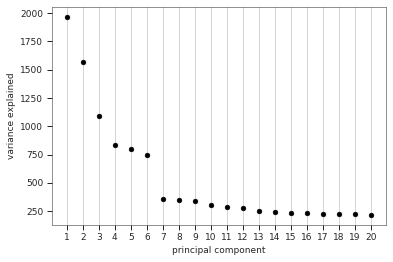

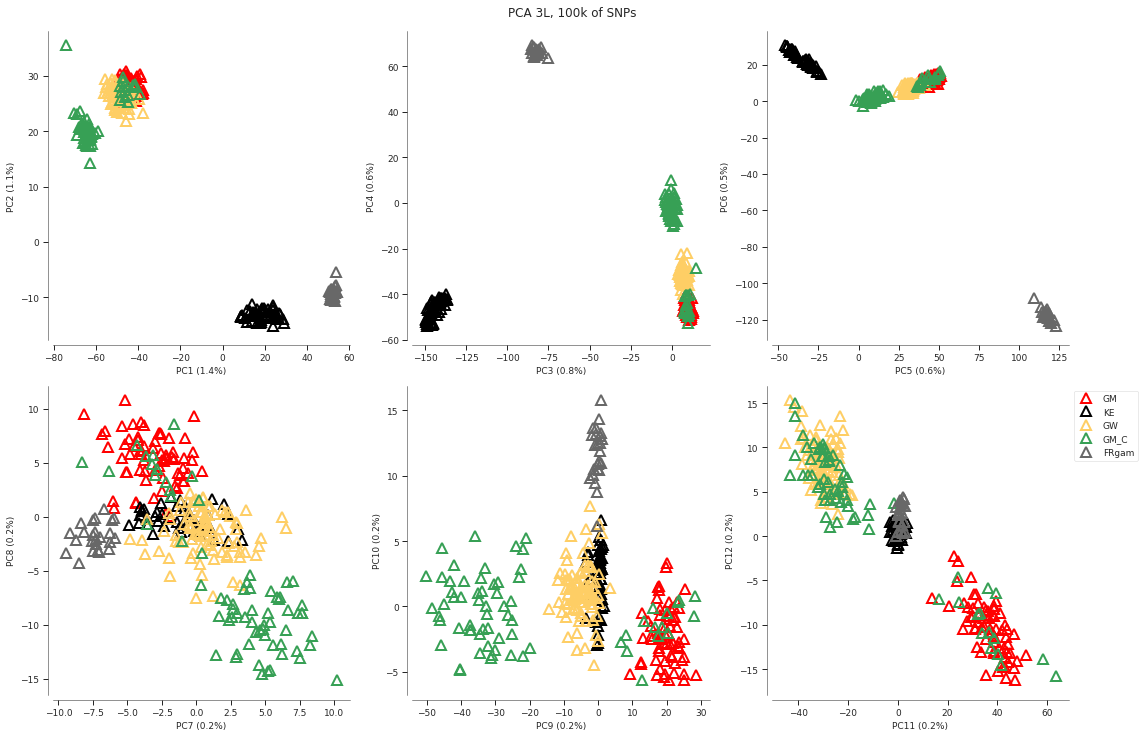

In [75]:
fig_pca(coords, model, 'PCA 3L, 100k of SNPs')

--------------------------------------------

## F3 statistics

F3 is motivated and primarily used as an admixturetest (Reichet al.2009). 
In this context, the null hypothesis is that F3 is nonnegative;i.e., the null hypothesis is that the data are generated from a phylogenetic tree that has positive edge lengths.
If this is not the case, the null hypothesis is rejected in favor of the more complex admixture graph. 

In [140]:
grp = df_samples.groupby("population")
grp_indices = grp.indices
ac_subpops = genotypes_combined.count_alleles_subpops(grp_indices)

In [150]:
ac_subpops

<AlleleCountsChunkedTable shape=(100000,) dtype=[('AOcol', '<i4', (3,)), ('BFcol', '<i4', (3,)), ('BFgam', '<i4', (3,)), ('CIcol', '<i4', (3,)), ('CMgam', '<i4', (3,)), ('FRgam', '<i4', (3,)), ('GAgam', '<i4', (3,)), ('GHcol', '<i4', (3,)), ('GHgam', '<i4', (3,)), ('GM', '<i4', (3,)), ('GM_C', '<i4', (3,)), ('GNcol', '<i4', (3,)), ('GNgam', '<i4', (3,)), ('GQgam', '<i4', (3,)), ('GW', '<i4', (3,)), ('KE', '<i4', (3,)), ('UGgam', '<i4', (3,))]
   nbytes=19.5M cbytes=2.2M cratio=8.7
   values=allel.chunked.storage_zarr.ZarrTable>

In [181]:
d, d_se, d_z, d_vb, d_vj = allel.average_patterson_f3(ac_subpops['GW'][:, :2], ac_subpops['GM'][:, :2], ac_subpops['KE'][:, :2], blen=100, normed=True)

In [182]:
tbl = [['chromosome', 'test', 'D', 'SE', 'Z']]

In [175]:
row = ["3L", 'GW, GM, KE',d, d_se, d_z]

In [176]:
tbl += [row]

In [180]:
etl.wrap(tbl).interpolate('D', '%.3f').interpolate('SE', '%.4f').interpolate('Z', '%.1f').displayall(index_header=False,tr_style=lambda row: 'background-color: %s' % ('#afa' if float(row.Z) > 5 else '#aaf' if float(row.Z) < -5 else 'white'))

chromosome,test,D,SE,Z
3L,"GW, GM, KE",0.004,0.0005,7.3


In [194]:
def f3_stat(pop1,pop2,pop3, blen=100):
    ac1 = ac_subpops[pop1]
    ac2 = ac_subpops[pop2]
    ac3 = ac_subpops[pop3]
    d, d_se, d_z, d_vb, d_vj = allel.average_patterson_f3(ac1[:, :2], ac2[:, :2], ac3[:, :2], blen=blen, normed=True)
    tbl = [['chromosome', 'test', 'D', 'SE', 'Z']]
    row = ["3L", '%s, %s, %s' % (pop1, pop2, pop3),d, d_se, d_z]
    tbl += [row]
    etl.wrap(tbl).interpolate('D', '%.3f').interpolate('SE', '%.4f').interpolate('Z', '%.1f').displayall(index_header=False,tr_style=lambda row: 'background-color: %s' % ('#afa' if float(row.Z) > 5 else '#aaf' if float(row.Z) < -5 else 'white'))
    

In [195]:
f3_stat('GW', 'GM', 'KE')

chromosome,test,D,SE,Z
3L,"GW, GM, KE",0.004,0.0005,7.3


-----------------

## Sandbox

In [21]:
gambia_phase2 = da.from_array(gambia_phase2)
gambia_phase2

dask.array<array, shape=(6888812, 68, 2), dtype=int8, chunksize=(982215, 68, 2)>

In [22]:
genotypes_phase2_sel = da.from_array(genotypes_phase2_sel)
genotypes_phase2_sel

,Array,Chunk
Bytes,15.73 GB,130.62 MB
Shape,"(6888812, 1142, 2)","(57188, 1142, 2)"
Count,122 Tasks,121 Chunks
Type,int8,numpy.ndarray


In [119]:
data = [genotypes_phase2_sel, gambia_phase2]

In [128]:
x = da.concatenate(data, axis=1)
x

,Array,Chunk
Bytes,16.67 GB,130.62 MB
Shape,"(6888812, 1210, 2)","(57188, 1142, 2)"
Count,913 Tasks,256 Chunks
Type,int8,numpy.ndarray


In [129]:
y = x.rechunk((1000, 1210, 2))
y

,Array,Chunk
Bytes,16.67 GB,2.42 MB
Shape,"(6888812, 1210, 2)","(1000, 1210, 2)"
Count,16991 Tasks,6889 Chunks
Type,int8,numpy.ndarray


In [130]:
y.to_zarr('GT_3L_phase2_gambia.zarr')

KilledWorker: ('array-original-5c3bf6938b386e1afcd5e774f1b65bf2', <Worker 'tcp://10.32.254.3:43407', memory: 0, processing: 1>)